# Errata Questão 39

[Prova 2016](https://www.educacao.assis.sp.gov.br/uploads/editor/novo2/files/Prova%20Bolsista%202016.pdf)

[Gabarito 2016](https://www.educacao.assis.sp.gov.br/uploads/editor/novo2/files/Edital%2009.pdf)

Em um jogo de tabuleiro, jogamos dois dados comuns. Qual a probabilidade
de que o total de pontos seja igual a 8?

* a) 1/12
* b) 1/18
* c) 1/20
* d) 1/24


In [1]:
import pandas as pd
import numpy as np

### Gerando o espaço amostral

In [2]:
def gerar_espaco_amostral():
    for d1 in range(1,7):
        for d2 in range(1,7):
            yield d1, d2

espaco_amostral = list(gerar_espaco_amostral())

df = pd.DataFrame.from_records(espaco_amostral, columns=('d1','d2',))
df

,d1,d2
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,2,1
7,2,2
8,2,3
9,2,4


### Calculando soma e verificando se é o resultado esperado

In [3]:
resultados = list([ d1 + d2 for d1,d2 in espaco_amostral])
favoraveis = list([ d1 + d2 == 8 for d1,d2 in espaco_amostral ])
df = df.assign(soma=resultados, favoravel=favoraveis)
df

,d1,d2,soma,favoravel
0,1,1,2,False
1,1,2,3,False
2,1,3,4,False
3,1,4,5,False
4,1,5,6,False
5,1,6,7,False
6,2,1,3,False
7,2,2,4,False
8,2,3,5,False
9,2,4,6,False


In [4]:
df[['favoravel']].groupby(['favoravel']).size()

favoravel
False    31
True      5
dtype: int64

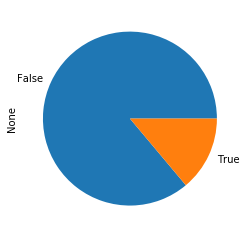

In [6]:
df[['favoravel']].groupby(['favoravel']).size().plot.pie(y='favoravel')

### Prova empirica

In [15]:
from random import randint
def lancar_dados():
    return randint(1,6), randint(1,6)

total_de_lancamentos = 100000.0

lancamentos = [ lancar_dados() for i in range(int(total_de_lancamentos))]

df = pd.DataFrame.from_records(lancamentos, columns=('d1','d2',))
df


,d1,d2
0,3,2
1,6,4
2,4,1
3,4,1
4,6,2
5,5,6
6,4,5
7,4,6
8,5,2
9,6,2


In [16]:
resultados = list([ d1 + d2 for d1,d2 in lancamentos])
favoraveis = list([ d1 + d2 == 8 for d1,d2 in lancamentos ])
df = df.assign(soma=resultados, favoravel=favoraveis)
df

,d1,d2,soma,favoravel
0,3,2,5,False
1,6,4,10,False
2,4,1,5,False
3,4,1,5,False
4,6,2,8,True
5,5,6,11,False
6,4,5,9,False
7,4,6,10,False
8,5,2,7,False
9,6,2,8,True


In [17]:
df[['favoravel']].groupby(['favoravel']).size()

favoravel
False    86197
True     13803
dtype: int64

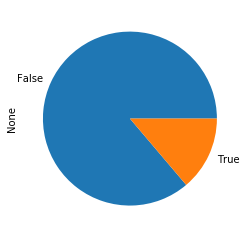

In [18]:
df[['favoravel']].groupby(['favoravel']).size().plot.pie(y='favoravel')

### Resposta esperada

# 5/36

Chance do primeiro dado dar um número esperado ( 2,3,4,5,6) multiplicado pela chance do segundo dado dar o numéro necessário ( 6 - d1).

5/6 . 1/6 = 5/36